In [105]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import requests
import json
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import re
import time 
from tqdm.notebook import tqdm



from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import glm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [106]:
#reading in the file 2012 and saving it as all_years, then in the next cells, add the data from other years
all_years= pd.read_csv('../data/reps/reps_2012.csv')

In [107]:
all_years= all_years.append(pd.read_csv('../data/reps/reps_2014.csv'))

In [108]:
all_years=all_years.append(pd.read_csv('../data/reps/reps_2016.csv'))

In [109]:
all_years=all_years.append(pd.read_csv('../data/reps/reps_2018.csv'))

In [110]:
all_years=all_years.append(pd.read_csv('../data/reps/reps_2020.csv'))

In [111]:
all_years=all_years.append(pd.read_csv('../data/reps/reps_2010.csv'))

In [157]:
all_years.head(3)

,candidate,party,state,district,incumbent,winner,raised,spent,year
0,Jo Bonner,R,AL,1,incumbent,winner,1140567,1263168,2012
1,Curtis Railey,I,AL,1,not-incumbent,not-winner,18015,15646,2012
2,Martha Roby,R,AL,2,incumbent,winner,1035717,862502,2012


In [113]:
#replacing null elements with 0 
all_years['incumbent']=all_years['incumbent'].fillna(0)

In [115]:
#replacing Incumbent with incumbent 
all_years['incumbent'] = all_years['incumbent'].replace({'Incumbent': 'incumbent'})

In [119]:
#replacing 0 with not-incumbents
all_years['incumbent'] = all_years['incumbent'].replace({0: 'not-incumbent'})

In [114]:
#replacing null elements with 0 
all_years['winner']=all_years['winner'].fillna(0)

In [121]:
#replacing Winner with winner
all_years['winner'] = all_years['winner'].replace({'Winner': 'winner'})

In [123]:
#replacing 0 with not-winner
all_years['winner'] = all_years['winner'].replace({0: 'not-winner'})

In [125]:
all_years.head(3)

,candidate,party,state,district,incumbent,winner,raised,spent,year
0,Jo Bonner,R,AL,1,incumbent,winner,1140567,1263168,2012
1,Curtis Railey,I,AL,1,not-incumbent,not-winner,18015,15646,2012
2,Martha Roby,R,AL,2,incumbent,winner,1035717,862502,2012


In [126]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5192 entries, 0 to 946
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   candidate  5133 non-null   object
 1   party      5192 non-null   object
 2   state      5192 non-null   object
 3   district   5192 non-null   int64 
 4   incumbent  5192 non-null   object
 5   winner     5192 non-null   object
 6   raised     5192 non-null   int64 
 7   spent      5192 non-null   int64 
 8   year       5192 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 405.6+ KB


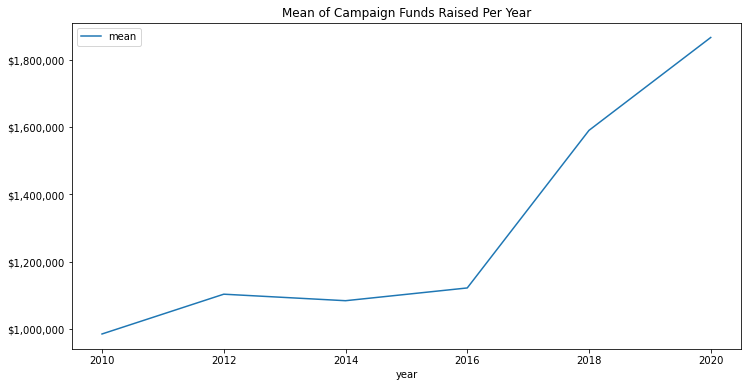

In [142]:
#plot the mean of money raised over the years
fig, ax = plt.subplots(figsize=(12, 6))
all_years.groupby('year').mean('raised')['raised'].plot(label='mean', ax=ax)
plt.title('Mean of Campaign Funds Raised Per Year')
plt.legend()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

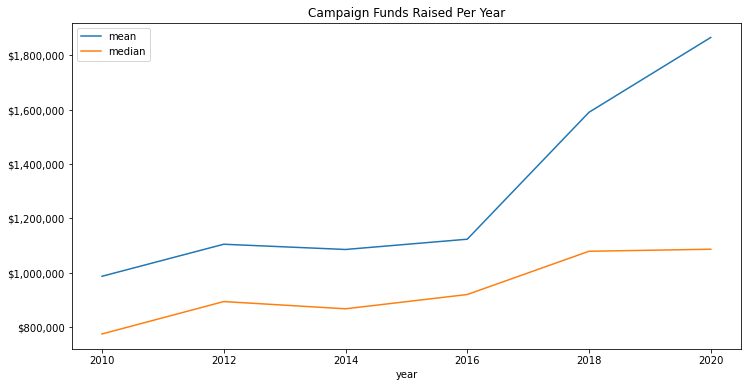

In [148]:
#plot both the mean and median of the money raised over the years
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

all_years.groupby('year').mean('raised')['raised'].plot(label = 'mean', ax = ax)

all_years.groupby('year').median('raised')['raised'].plot(label = 'median', ax = ax)

plt.title('Campaign Funds Raised Per Year')
plt.legend()
plt.ticklabel_format(style='plain')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

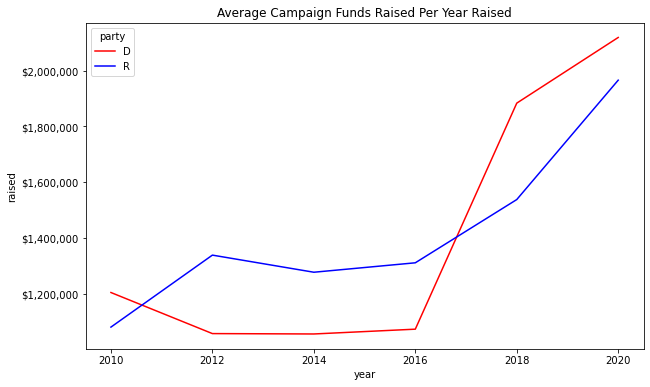

In [35]:
#average campaing fund raised by R and D
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data = two_parties.groupby(['party','year']).mean('raised'),
            x = 'year',
            y = 'raised',
            hue = 'party',
            palette = ['red', 'blue'])
plt.title('Average Campaign Funds Raised Per Year Raised')
plt.ticklabel_format(style='plain')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

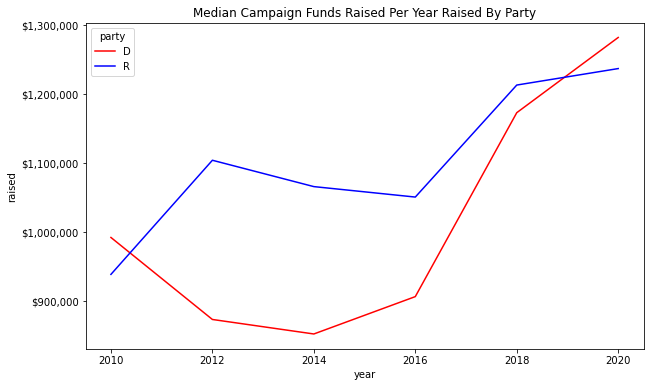

In [32]:
#median campaign fund raised by D and R
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data = two_parties.groupby(['party','year']).median('raised'),
            x = 'year',
            y = 'raised',
            hue = 'party',
            palette = ['red', 'blue'])
plt.title('Median Campaign Funds Raised Per Year Raised By Party')
plt.ticklabel_format(style='plain')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

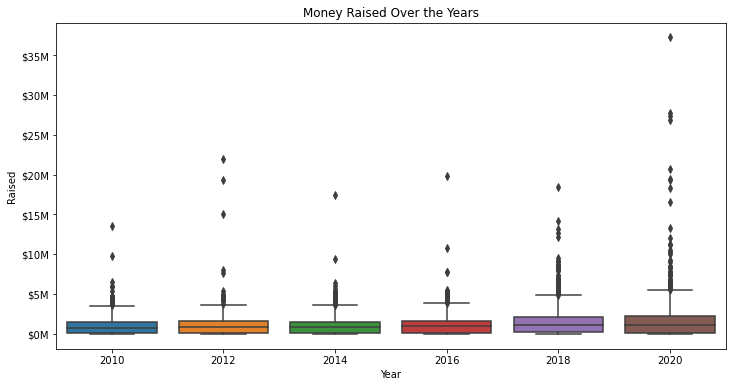

In [150]:
#build boxplots for money raised over the years
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
g= sns.boxplot(data = all_years, x = 'year', y = 'raised')
plt.ticklabel_format(style='plain', axis = 'y')
ax.set_title('Money Raised Over the Years')   
ax.set_xlabel('Year')
ax.set_ylabel('Raised')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, 
                                                  pos:'${:,.0f}'.format(x/1000000) + 'M'));

<Figure size 864x432 with 0 Axes>

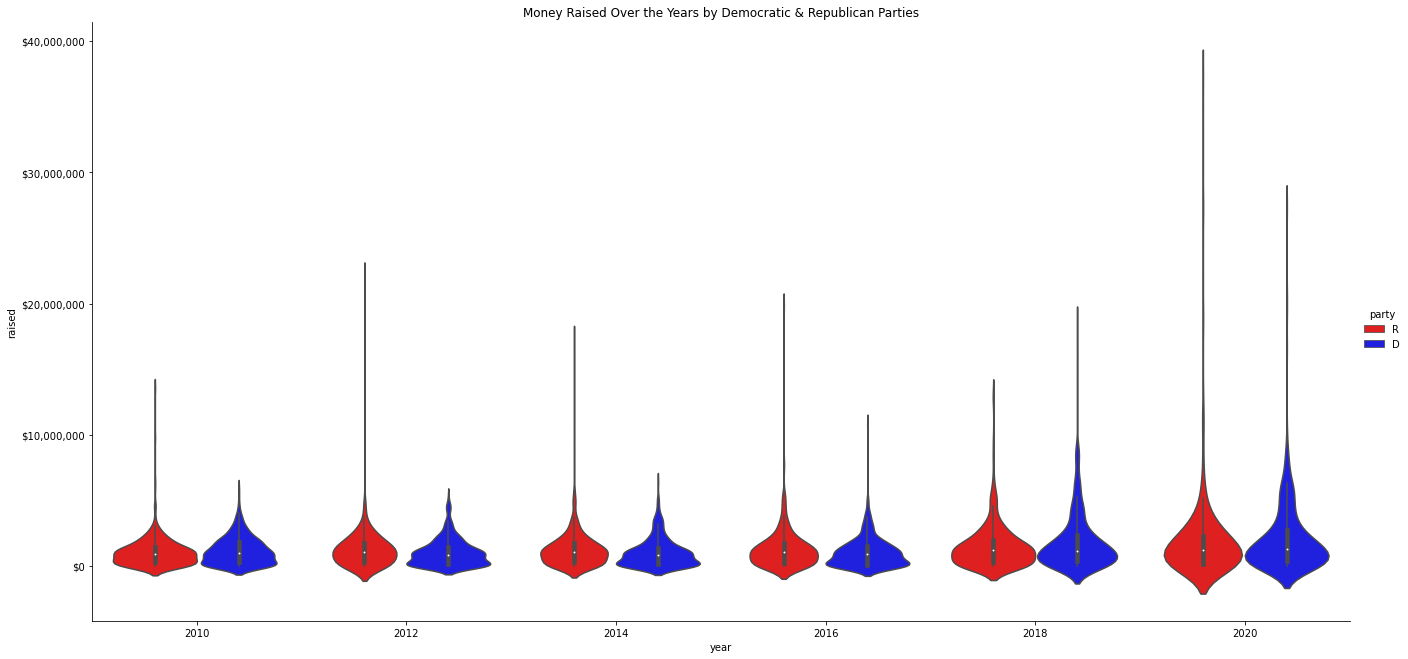

In [156]:
#build catplot with violin kind to show money raised over the years by democrats and republicans
ax = plt.figure(figsize = (12,6))
g = sns.catplot(data = two_parties,
                x = 'year',
                y = 'raised',
                hue = 'party',
                kind = 'violin',
                palette = ['red', 'blue'],
                height = 9,
                aspect = 2)
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Money Raised Over the Years by Democratic & Republican Parties')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tick)

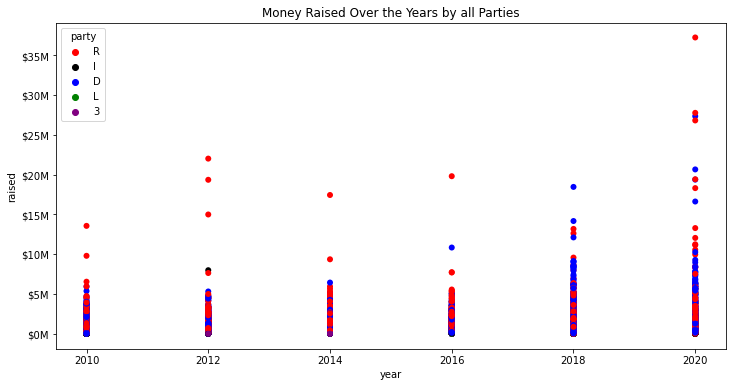

In [160]:
#build scatterplot to show money raised over the years by all parties
fig, ax=plt.subplots(figsize=(12,6))
sns.scatterplot(x=all_years['year'], y=all_years['raised'], hue=all_years['party'], 
                palette = ['Red', 'black', 'blue', 'Green', 'Purple'],
               linewidth=0, ax=ax)
dots=ax.collections[-1]
offsets=dots.get_offsets()
jittered_offsets= offsets + np.random.uniform(0, 1, offsets.shape)
dots.set_offsets(jittered_offsets)
plt.title('Money Raised over the Years by Parties')
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Money Raised Over the Years by all Parties')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, 
                                                  pos: '${:,.0f}'.format(x/1000000) + 'M'));

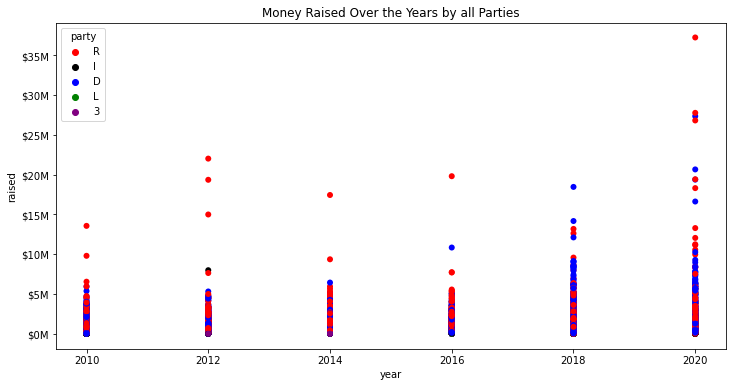

In [171]:
#build scatterplot to show money raised over the years by all parties
fig, ax=plt.subplots(figsize=(12,6))
sns.scatterplot(x=all_years['year'], y=all_years['raised'], hue=all_years['party'], 
                palette = ['Red', 'black', 'blue', 'Green', 'Purple'],
               linewidth=0, ax=ax)
dots=ax.collections[-1]
offsets=dots.get_offsets()
jittered_offsets= offsets + np.random.uniform(0, 1, offsets.shape)
dots.set_offsets(jittered_offsets)
plt.title('Money Raised over the Years by Parties')
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Money Raised Over the Years by all Parties')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, 
                                                  pos: '${:,.0f}'.format(x/1000000) + 'M'));


In [161]:
two_parties= all_years[(all_years['party'] == 'D') | (all_years['party'] == 'R')]
two_parties.head(3)

,candidate,party,state,district,incumbent,winner,raised,spent,year
0,Jo Bonner,R,AL,1,incumbent,winner,1140567,1263168,2012
2,Martha Roby,R,AL,2,incumbent,winner,1035717,862502,2012
3,Mike D Rogers,R,AL,3,incumbent,winner,1069891,982102,2012


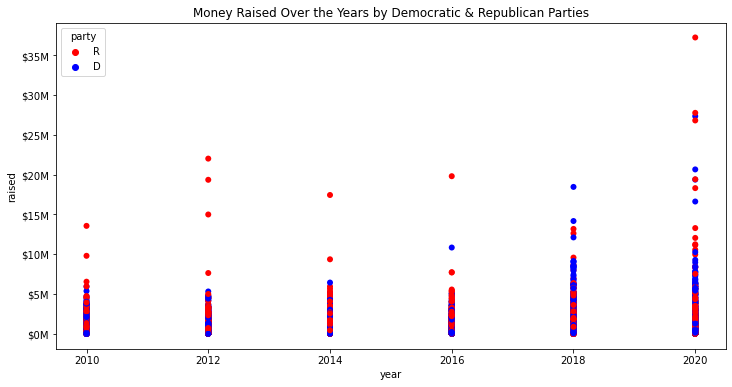

In [173]:
#build scatterplot to show money raised over the years by democrats and republicans
fig, ax=plt.subplots(figsize=(12,6))
sns.scatterplot(x=two_parties['year'], y=two_parties['raised'], hue=two_parties['party'], palette = ['Red', 'blue'],
               linewidth=0, ax=ax)
dots=ax.collections[-1]
offsets=dots.get_offsets()
jittered_offsets= offsets + np.random.uniform(0, 1, offsets.shape)
dots.set_offsets(jittered_offsets)
plt.title('Money Raised Over the Years by Democratic & Republican Parties')
plt.ticklabel_format(style='plain', axis = 'y')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, 
                                                  pos: '${:,.0f}'.format(x/1000000) + 'M'));

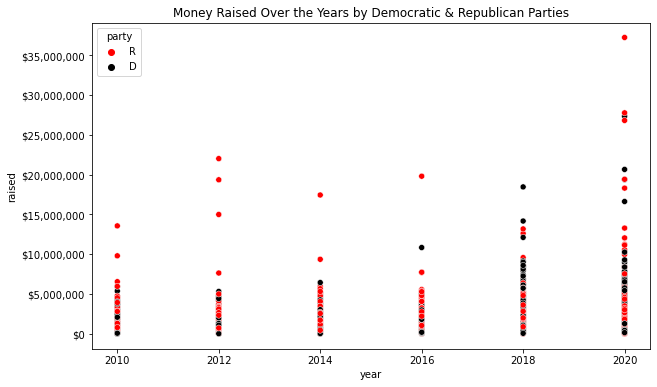

In [175]:
#this is the same plot as previous one but the numbers on the y-axis have a different format
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=two_parties['year'], y=two_parties['raised'], hue=two_parties['party'], palette = ['Red', 'black'], ax = ax)
plt.title('Money Raised Over the Years by Democratic & Republican Parties')
plt.ticklabel_format(style='plain')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

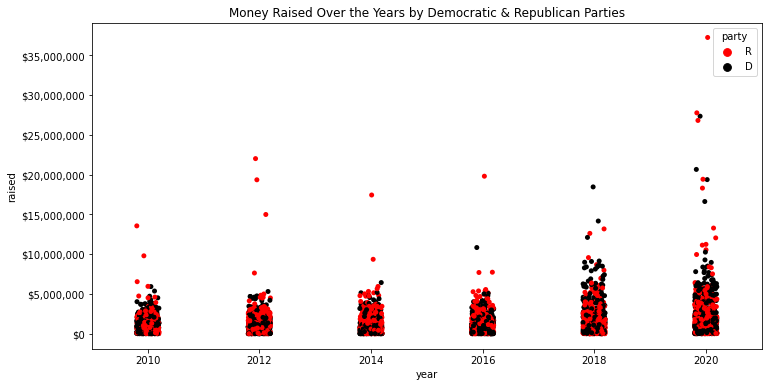

In [169]:
#stripplpt for money raised by R and D parties
fig, ax = plt.subplots(figsize=(12, 6))
sns.stripplot(x=two_parties['year'], y=two_parties['raised'], hue=two_parties['party'], palette = ['Red', 'black'], ax = ax)
plt.title('Money Raised Over the Years by Democratic & Republican Parties')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

In [180]:
year_2020=all_years.set_index('year').loc[2020]
year_2020.head(3)

,candidate,party,state,district,incumbent,winner,raised,spent
year,,,,,,,,
2020,Jerry Carl,R,AL,1,not-incumbent,winner,1971321,1859349
2020,James Averhart,D,AL,1,not-incumbent,not-winner,80095,78973
2020,Barry Moore,R,AL,2,not-incumbent,winner,650807,669368


In [76]:
high= year_2020.nlargest(5, 'raised')
high

,candidate,party,state,district,incumbent,winner,raised,spent
year,,,,,,,,
2020,Steve Scalise,R,LA,1,1,1,37262827,32830607
2020,Kevin McCarthy,R,CA,23,1,1,27780644,24265583
2020,Nancy Pelosi,D,CA,12,1,1,27359508,22064953
2020,Devin Nunes,R,CA,22,1,1,26825212,20156093
2020,Alexandria Ocasio,D,NY,14,1,1,20664795,16735422


<AxesSubplot:xlabel='candidate'>

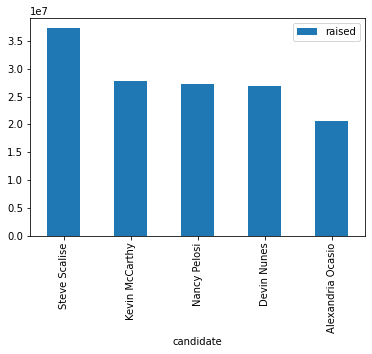

In [178]:
#plot showing top 5 fundraisers
high.plot (kind='bar', x= 'candidate', y= 'raised')